# Análisis de datos exploratorio

En este notebook se realiza el análisis de datos exploratorio del conjunto de datos de cactus. 

Alianza UNAM-HUAWEI
Equipo 9 IPN

Respondables: Jannet, Irving

Variables a obtener:
- Número total de ejemplos
- Número de clases
- Esta balanceado
- Características de las imágenes

In [1]:
# Variables
NTE = 0
NTC = 0
is_balanced = False
imgs_shape = None

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import glob
import mimetypes
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import collections
import plotly.express as px
import seaborn as sns

from matplotlib import pyplot
from matplotlib.image import imread
from fastai.vision import *
from fastai import *

# Input data files are available in the read-only "../input/" directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [3]:
# Definir directorios
path_cactus = '../input/cactus-aerial-photos/training_set/training_set/cactus' 
path_nocactus = '../input/cactus-aerial-photos/training_set/training_set/no_cactus'
train_cactus = os.listdir(path_cactus)
train_no_cactus = os.listdir(path_nocactus)
validation_set_cactus = os.listdir('../input/cactus-aerial-photos/validation_set/validation_set/cactus')
validation_set_nocactus = os.listdir('../input/cactus-aerial-photos/validation_set/validation_set/no_cactus')

In [4]:
# mostrar los archivos que estan en el dataset
print(train_cactus[0:16])

['cactus_0144_226.jpg', 'cactus_0153_188.jpg', 'cactus_0070_510.jpg', 'cactus_0115_36.jpg', 'cactus_0083_37.jpg', 'cactus_0163_81.jpg', 'cactus_0126_79.jpg', 'cactus_0140_154.jpg', 'cactus_0132_105.jpg', 'cactus_0144_184.jpg', 'cactus_0106_48.jpg', 'cactus_0154_118.jpg', 'cactus_0152_69.jpg', 'cactus_0085_41.jpg', 'cactus_0150_145.jpg', 'cactus_0179_5.jpg']


## Análisis cuantitativo

Número de imágenes disponibles para entrenamiénto

In [5]:
print(len(train_cactus), 'Imágenes de entrenamiénto con cactus')
print(len(train_no_cactus), 'Imagenes de entrenamiénto sin cactus')

print('Total de imágenes de entrenamiento:', len(train_cactus) + len(train_no_cactus) )

NTE = len(train_cactus) + len(train_no_cactus)

13136 Imágenes de entrenamiénto con cactus
4364 Imagenes de entrenamiénto sin cactus
Total de imágenes de entrenamiento: 17500


Número de imágenes para validación 

In [6]:
print(len(validation_set_cactus), 'Imágenes para validación con cactus')
print(len(validation_set_nocactus), 'Imagenes para validación sin cactus')

print('Total de imágenes de validación', len(validation_set_cactus) + len(validation_set_nocactus))
NTE += len(validation_set_cactus) + len(validation_set_nocactus)


3000 Imágenes para validación con cactus
1000 Imagenes para validación sin cactus
Total de imágenes de validación 4000


## Visualizar ejemplos de las imágenes

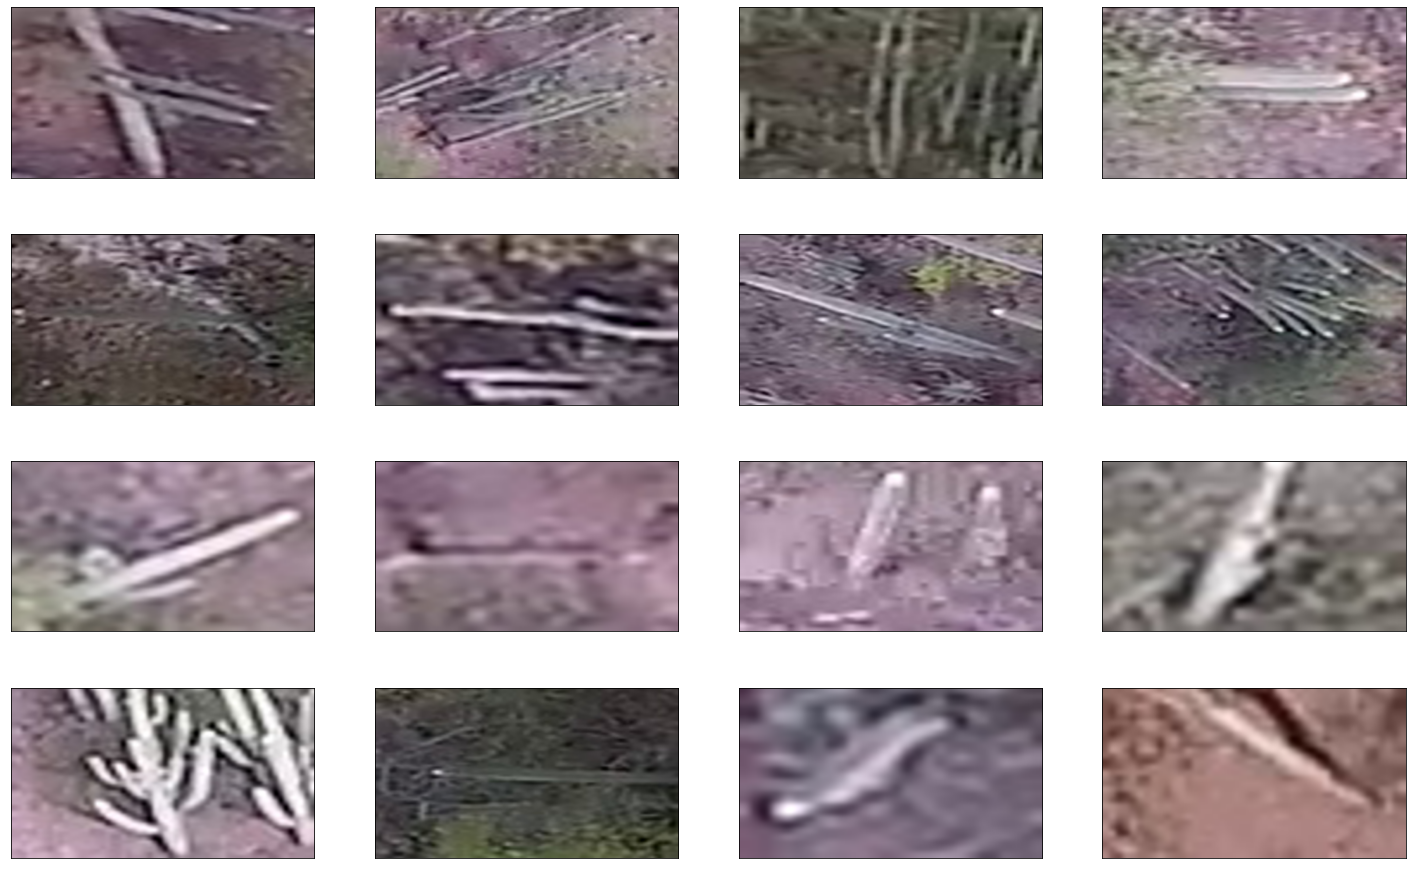

In [7]:
fig = plt.figure(figsize=(25, 16))
for i,im_path in enumerate(train_cactus[:16]):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    im = Image.open('../input/cactus-aerial-photos/training_set/training_set/cactus/' + im_path)
    im = im.resize((480,270))
    plt.imshow(im)

In [8]:
ej_img = train_cactus[:0]
img = Image.open('../input/cactus-aerial-photos/training_set/training_set/cactus/'+ im_path)
print(np.shape(img))

(31, 44, 3)


## Análisis sobre los canales disponibles en las imágenes.

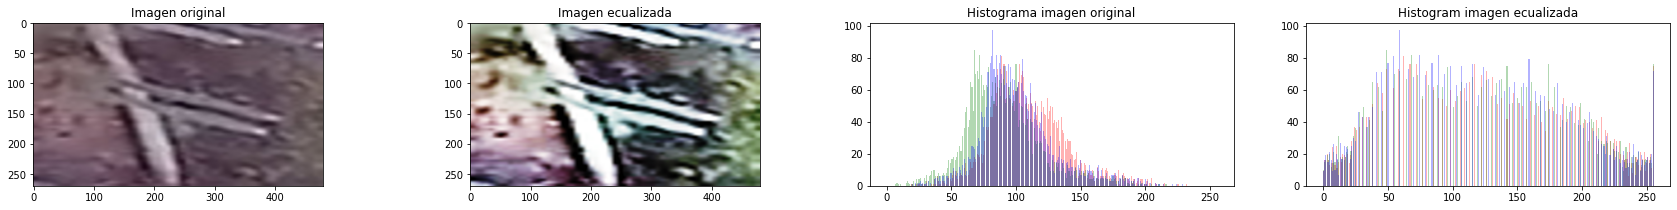

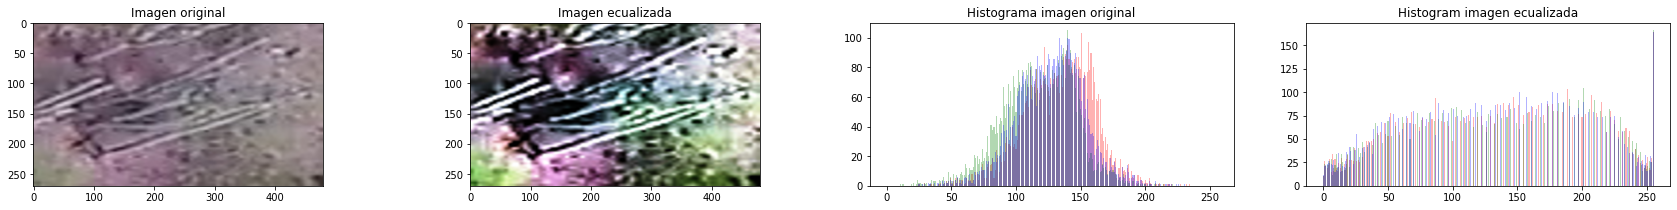

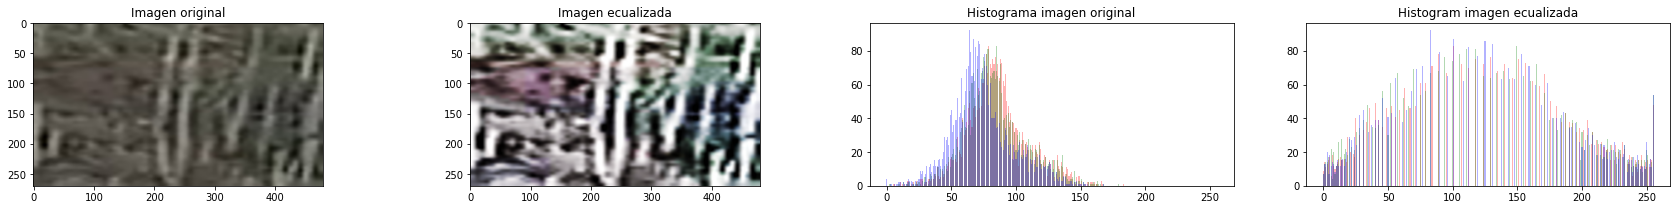

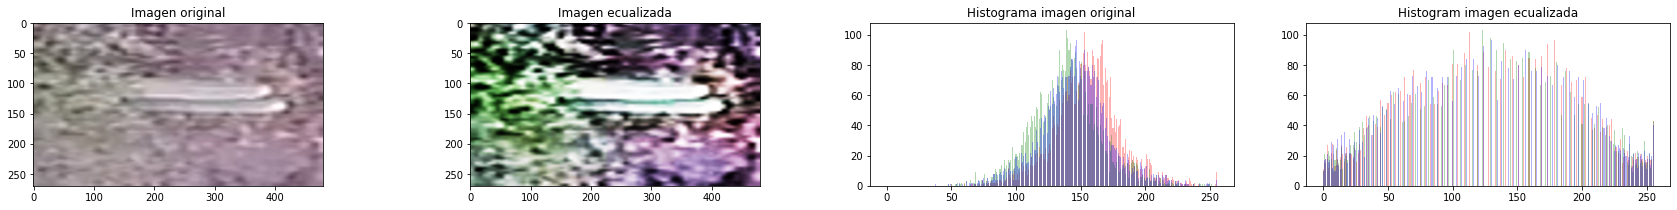

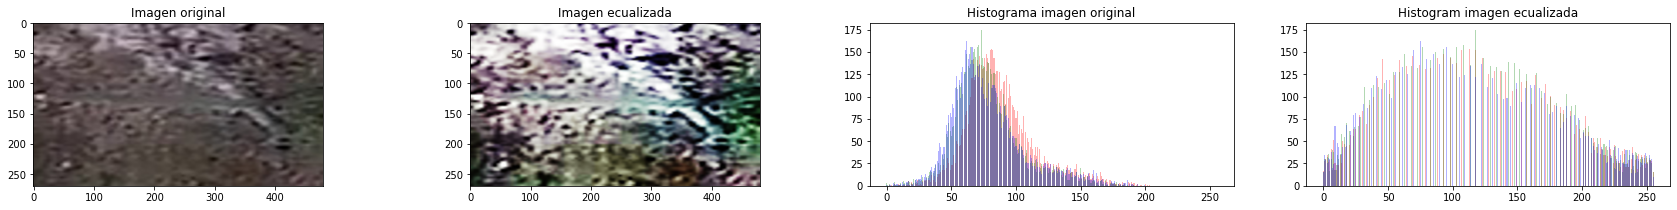

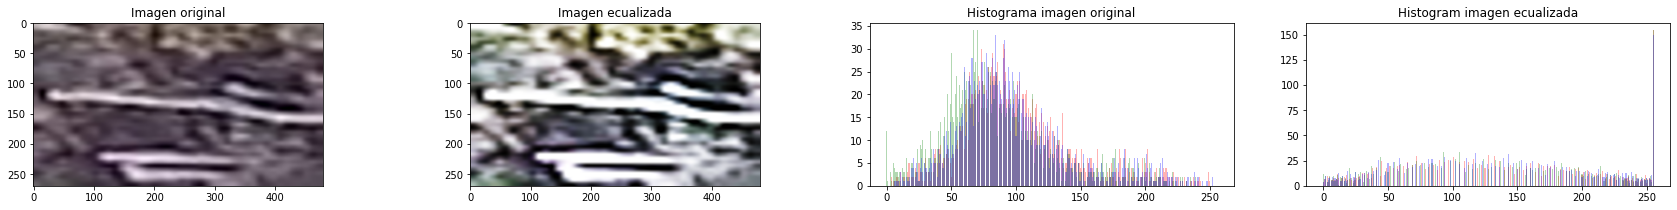

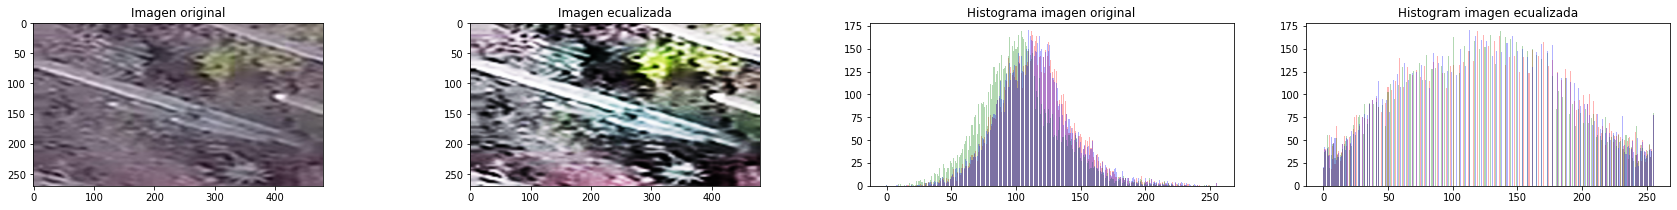

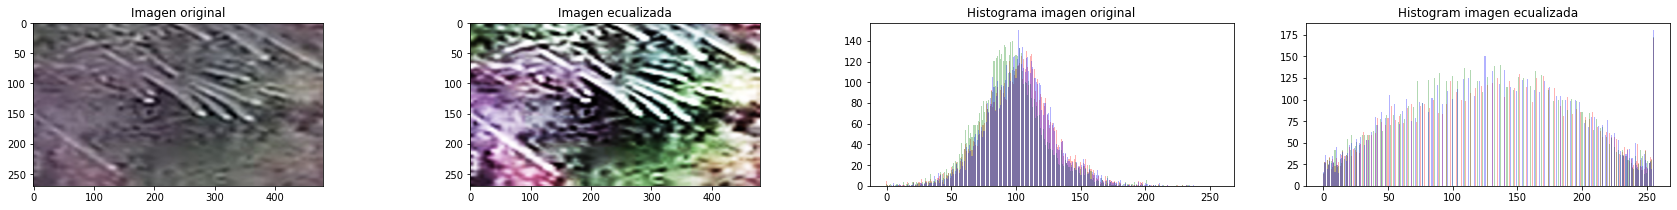

In [9]:
# Verificar que la imágen contenga los tres canales.

from PIL import  ImageOps 

for i,im_path in enumerate(train_cactus[:8]):
    im1 = Image.open('../input/cactus-aerial-photos/training_set/training_set/cactus/' + im_path)
    im2 = ImageOps.equalize(im1, mask = None)

    hst1=im1.histogram()
    hst2=im2.histogram()
    
    #limitar a las frecuencias superiores a 50000 para una mejor visiualizacion del histograma
    for j in range(0, 768):     
        if hst1[j]>=50000 : hst1[j] = 50000 #limitar a las frecuencias superiores a 50000 para una mejor visiualizacion del histograma
        if hst2[j]>=50000 : hst2[j] = 50000 #limitar a las frecuencias superiores a 50000 para una mejor visiualizacion del histograma
    
    plt.figure(figsize=(30, 3))
    
    plt.subplot(141)
    im1 = im1.resize((480,270))
    plt.title('Imagen original')
    plt.imshow(im1)
    
    plt.subplot(142)
    im2 = im2.resize((480,270))
    plt.title('Imagen ecualizada')
    plt.imshow(im2)
        
    plt.subplot(143)
    for i in range(0, 256):
        plt.bar(i, hst1[i],color = 'red'   ,alpha=0.3)
        plt.bar(i, hst1[i+256], color = 'green',alpha=0.3)
        plt.bar(i, hst1[i+512], color = 'blue',alpha=0.3)
        plt.title('Histograma imagen original')
    plt.figure(1)             # plots a figure to display Histogram
        
    plt.subplot(144)
    for i in range(0, 256):
        plt.bar(i, hst2[i],color = 'red'   ,alpha=0.3)
        plt.bar(i, hst2[i+256], color = 'green',alpha=0.3)
        plt.bar(i, hst2[i+512], color = 'blue',alpha=0.3)
        plt.title('Histogram imagen ecualizada')
    plt.figure(1)             # plots a figure to display Histogram


    plt.show()

In [10]:
# Print obtained variables

print("Número total de ejemplos: ", NTE)


Número total de ejemplos:  21500


## Conclusiones

El conjunto de datos contiene un total de 21500 ejemplos.